<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def calculate_mean(number_list):
    return sum(number_list)/ len(number_list)

calculate_mean([1,2,3,4])

2.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def calculate_stdev(number_list):
    n = len(number_list)
    u = calculate_mean(number_list)
    sum_differences = sum([(x - u) ** 2 for x in number_list])
    return ((1 / n) * sum_differences) ** 0.5

calculate_stdev([1,2,3,4])
        

1.118033988749895

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def clean_data(percent_string):
    definitely_string = str(percent_string)
    if definitely_string != '':
        percent = definitely_string.strip('%')
        return float(percent) / 100

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
sat_state_2019 = pd.read_csv('data/sat_2019.csv')

In [6]:
sat_major_2019 = pd.read_csv('data/sat_2019_by_intended_college_major.csv')

In [7]:
sat_state_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [8]:
sat_major_2019.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [9]:
sat_state_2018 = pd.read_csv('data/sat_2018.csv')

In [10]:
sat_state_2017 = pd.read_csv('data/sat_2017.csv')

In [11]:
sat_state_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [12]:
sat_state_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055



#### Check for missing values.

In [13]:
sat_state_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [14]:
sat_major_2019.isnull().sum()

IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

In [15]:
sat_state_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [16]:
sat_state_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest)

In [17]:
sat_state_2017.describe()
# The min for the Math column is below the SAT math section minimum of 200

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [18]:
sat_state_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [19]:
sat_state_2019.describe()

,EBRW,Math,Total
count,53.000000,53.000000,53.000000
mean,558.000000,548.471698,1106.528302
std,47.554422,53.785044,100.994784
min,483.000000,445.000000,935.000000
25%,518.000000,506.000000,1024.000000
50%,550.000000,545.000000,1097.000000
75%,610.000000,596.000000,1200.000000
max,636.000000,648.000000,1284.000000


In [20]:
sat_major_2019.describe()

,Total,ReadingWriting,Math
count,38.000000,38.000000,38.000000
mean,1058.500000,535.500000,523.000000
std,82.445969,41.362439,43.386385
min,916.000000,458.000000,456.000000
25%,988.250000,501.250000,486.500000
50%,1066.500000,537.000000,527.000000
75%,1115.500000,569.750000,542.250000
max,1242.000000,597.000000,646.000000


In [21]:
# Check how many Math scores are under 200 
sat_state_2017['Math'].sort_values()

20     52
8     468
7     492
12    493
22    495
9     497
19    499
43    507
6     512
10    515
36    517
29    520
40    521
32    523
39    524
4     524
30    526
48    528
38    531
14    532
1     533
47    534
33    535
46    541
11    541
37    548
21    551
45    551
2     553
28    553
13    556
31    561
35    570
0     572
18    586
26    591
3     594
5     595
41    603
42    604
50    604
24    607
44    614
17    616
34    621
27    625
16    628
25    631
15    635
49    649
23    651
Name: Math, dtype: int64

In [22]:
# Replace bad value with a null
sat_state_2017.loc[sat_state_2017['Math'] == 52, 'Math'] = None

In [23]:
sat_state_2017['Math'].sort_values()

8     468.0
7     492.0
12    493.0
22    495.0
9     497.0
19    499.0
43    507.0
6     512.0
10    515.0
36    517.0
29    520.0
40    521.0
32    523.0
39    524.0
4     524.0
30    526.0
48    528.0
38    531.0
14    532.0
1     533.0
47    534.0
33    535.0
46    541.0
11    541.0
37    548.0
21    551.0
45    551.0
2     553.0
28    553.0
13    556.0
31    561.0
35    570.0
0     572.0
18    586.0
26    591.0
3     594.0
5     595.0
41    603.0
42    604.0
50    604.0
24    607.0
44    614.0
17    616.0
34    621.0
27    625.0
16    628.0
25    631.0
15    635.0
49    649.0
23    651.0
20      NaN
Name: Math, dtype: float64

#### Display the data types of each feature.

In [24]:
sat_state_2017.dtypes

State                                  object
Participation                          object
Evidence-Based Reading and Writing      int64
Math                                  float64
Total                                   int64
dtype: object

In [25]:
sat_state_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [26]:
sat_state_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [27]:
sat_major_2019.dtypes

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

#### Fix any incorrect data types found in step 5.

In [28]:
# This didn't work, so I needed to find the problem with Participation columns besides just a % sign
# sat_state_2019['Participation Rate'] = sat_state_2019['Participation Rate'].map(clean_data)

In [29]:
#The problem is dashes
sat_state_2019['Participation Rate'].sort_values()

12    100%
22    100%
5     100%
6     100%
7     100%
40    100%
9     100%
13    100%
31     18%
35     19%
34      2%
28     20%
36     22%
51      3%
27      3%
52      3%
24      3%
42      3%
15      3%
2      31%
16      4%
17      4%
45      4%
23      4%
25      4%
1      41%
18      5%
33     51%
37     51%
11     54%
3       6%
4      63%
14     66%
46     66%
44     68%
41     68%
48     68%
43      7%
0       7%
49     70%
38     70%
10     71%
32     79%
21     81%
30     82%
20     82%
26      9%
8      94%
29     95%
19     99%
50     99%
39       —
47       —
Name: Participation Rate, dtype: object

In [30]:
#drop Puerto Rico and the Virgin Islands
sat_state_2019.drop([39, 47], inplace=True)

sat_state_2019.shape

(51, 5)

In [31]:
sat_state_2019['Participation Rate'] = sat_state_2019['Participation Rate'].map(clean_data)

In [32]:
sat_state_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [33]:
sat_state_2018['Participation'] = sat_state_2018['Participation'].map(clean_data)

In [34]:
sat_state_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [35]:
sat_state_2017['Participation'] = sat_state_2017['Participation'].map(clean_data)
sat_state_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572.0,1165
1,Alaska,0.38,547,533.0,1080
2,Arizona,0.30,563,553.0,1116
3,Arkansas,0.03,614,594.0,1208
4,California,0.53,531,524.0,1055


In [36]:
# Remove the comma in TestTakers and make an int
def clean_test_takers(test_takers):
    cleaned_test_takers = test_takers.replace(',','')
    return int(cleaned_test_takers)
sat_major_2019['TestTakers'] = sat_major_2019['TestTakers'].map(clean_test_takers)

In [37]:
sat_major_2019.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...",24913,1%,977,496,481
1,Architecture and Related Services,28988,2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0%,1040,536,504
3,Biological and Biomedical Sciences,155834,8%,1139,572,566
4,"Business, Management, Marketing, and Related S...",221523,12%,1072,534,537


In [38]:
sat_major_2019.dtypes

IntendedCollegeMajor    object
TestTakers               int64
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

In [39]:
sat_major_2019['Percent'] = sat_major_2019['Percent'].map(clean_data)
sat_major_2019.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...",24913,0.01,977,496,481
1,Architecture and Related Services,28988,0.02,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040,536,504
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537


In [40]:
sat_major_2019.dtypes

IntendedCollegeMajor     object
TestTakers                int64
Percent                 float64
Total                     int64
ReadingWriting            int64
Math                      int64
dtype: object

In [41]:
sat_state_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                  float64
Total                                   int64
dtype: object

In [42]:
sat_state_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [43]:
sat_state_2019.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

#### Rename Columns

In [44]:
new_columns_dict = {
    'IntendedCollegeMajor': 'intended_college_major',
    'TestTakers': 'major_test_takers',
    'Percent': 'major_percent',
    'Total': 'major_total',
    'ReadingWriting': 'major_english',
    'Math': 'major_math'
}
sat_major_2019.rename(columns=new_columns_dict, inplace=True)

In [45]:
sat_major_2019.head()

,intended_college_major,major_test_takers,major_percent,major_total,major_english,major_math
0,"Agriculture, AgricultureOperations, and Relate...",24913,0.01,977,496,481
1,Architecture and Related Services,28988,0.02,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040,536,504
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537


In [46]:
new_columns_dict_2 = {
    'State': 'state',
    'Participation': 'participation_2017',
    'Evidence-Based Reading and Writing': 'english_2017',
    'Total': 'total_2017',
    'Math': 'math_2017'
}
sat_state_2017.rename(columns=new_columns_dict_2, inplace=True)

In [47]:
sat_state_2017.head(3)

,state,participation_2017,english_2017,math_2017,total_2017
0,Alabama,0.05,593,572.0,1165
1,Alaska,0.38,547,533.0,1080
2,Arizona,0.30,563,553.0,1116


In [48]:
new_columns_dict_3 = {
    'State': 'state',
    'Participation': 'participation_2018',
    'Evidence-Based Reading and Writing': 'english_2018',
    'Total': 'total_2018',
    'Math': 'math_2018'
}
sat_state_2018.rename(columns=new_columns_dict_3, inplace=True)

In [49]:
sat_state_2018.head(3)

,state,participation_2018,english_2018,math_2018,total_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149


In [50]:
new_columns_dict_4 = {
    'State': 'state',
    'Participation Rate': 'participation_2019',
    'EBRW': 'english_2019',
    'Total': 'total_2019',
    'Math': 'math_2019'
}
sat_state_2019.rename(columns=new_columns_dict_4, inplace=True)

In [51]:
sat_state_2019.head(3)

,state,participation_2019,english_2019,math_2019,total_2019
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134


#### I will drop the Other and Undecided majors because I am classifying majors into vocational and not. Unknown/other majors don't fit with my focus on major type.

In [52]:
sat_major_2019.drop([36, 37], inplace=True)

In [53]:
sat_major_2019

,intended_college_major,major_test_takers,major_percent,major_total,major_english,major_math
0,"Agriculture, AgricultureOperations, and Relate...",24913,0.01,977,496,481
1,Architecture and Related Services,28988,0.02,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040,536,504
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537
5,"Communication, Journalism, and Related Programs",36332,0.02,1069,550,519
6,Computer and Information Sciences and Support ...,79736,0.04,1156,571,585
7,"Construction Trades, General",2500,0.00,919,459,460
8,Education,71882,0.04,1022,519,503
9,Engineering,194127,0.11,1139,559,581


#### Merge dataframes that can be merged

In [54]:
two_year_state_level_data = pd.merge(sat_state_2019, sat_state_2018, on='state')

In [55]:
two_year_state_level_data.head(4)

,state,participation_2019,english_2019,math_2019,total_2019,participation_2018,english_2018,math_2018,total_2018
0,Alabama,0.07,583,560,1143,0.06,595,571,1166
1,Alaska,0.41,556,541,1097,0.43,562,544,1106
2,Arizona,0.31,569,565,1134,0.29,577,572,1149
3,Arkansas,0.06,582,559,1141,0.05,592,576,1169


In [56]:
all_state_level_data = pd.merge(two_year_state_level_data, sat_state_2017, on='state')

In [57]:
all_state_level_data.head(4)

,state,participation_2019,english_2019,math_2019,total_2019,participation_2018,english_2018,math_2018,total_2018,participation_2017,english_2017,math_2017,total_2017
0,Alabama,0.07,583,560,1143,0.06,595,571,1166,0.05,593,572.0,1165
1,Alaska,0.41,556,541,1097,0.43,562,544,1106,0.38,547,533.0,1080
2,Arizona,0.31,569,565,1134,0.29,577,572,1149,0.30,563,553.0,1116
3,Arkansas,0.06,582,559,1141,0.05,592,576,1169,0.03,614,594.0,1208


In [58]:
all_state_level_data.to_csv('data/all_state_level.csv', index=False)

In [59]:
sat_major_2019.to_csv('data/all_state_level.csv', index=False)

### Data Dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|sat_state_2017, sat_state_2018, sat_state_2019|US State|
|intended_college_major|object|sat_major_2019|Major that a student declares when taking the test|
|major_test_takers|int64|sat_major_2019|Number of test takers that declared a certain major|
|major_percent|float64|sat_major_2019|Percent of test takers that declared a certain major|
|major_total|int64|sat_major_2019|Overall SAT score in the majors data|
|major_english|int64|sat_major_2019|English, Reading, Writing score in the majors data
|major_math|int64|sat_major_2019|Math score in the majors data|
|math_2017|float64|sat_state_2017|Math score in the 2017 state data|
|math_2018|int64|sat_state_2018|Math score in the 2018 state data|
|participation_2017, participation_2018, participation_2019|float64|sat_state_2017, sat_state_2018, sat_state_2019|State SAT participation percent data|
|english_2017, english_2018, english_2019|int64|sat_state_2017, sat_state_2018, sat_state_2019|State SAT English, Reading, Writing scores|
|total_2017, total_2018, total_2019|int64|sat_state_2017, sat_state_2018, sat_state_2019|State SAT math scores|




## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### exercise 2 for sat_major_2019

In [60]:
sat_major_dict = sat_major_2019.to_dict()
sat_major_dict

{'intended_college_major': {0: 'Agriculture, AgricultureOperations, and Related Sciences',
  1: 'Architecture and Related Services',
  2: 'Area, Ethnic, Cultural, and Gender Studies',
  3: 'Biological and Biomedical Sciences',
  4: 'Business, Management, Marketing, and Related Support Services',
  5: 'Communication, Journalism, and Related Programs',
  6: 'Computer and Information Sciences and Support Services',
  7: 'Construction Trades, General',
  8: 'Education',
  9: 'Engineering',
  10: 'Engineering Technologies/Technicians',
  11: 'English Language and Literature/Letters',
  12: 'Family and Consumer Sciences/Human Sciences',
  13: 'Foreign Languages and Literatures, General',
  14: 'Health Professions and related Clinical Sciences',
  15: 'History, General',
  16: 'Legal Studies, General',
  17: 'Liberal Arts and Sciences, General Studies and Humanities',
  18: 'Library Science/Librarianship',
  19: 'Mathematics and Statistics',
  20: 'Mechanic and Repair Technologies/Technicians

In [61]:
sd = {column_name: calculate_stdev(column_contents.values()) for column_name, column_contents 
                   in sat_major_dict.items() if column_name != 'intended_college_major'}
sd

{'major_test_takers': 72479.75258296385,
 'major_percent': 0.03975620147292188,
 'major_total': 82.00106800719725,
 'major_english': 41.15780943852306,
 'major_math': 43.242818571696866}

#### summary statistics

In [62]:
sat_major_2019.describe()

,major_test_takers,major_percent,major_total,major_english,major_math
count,36.000000,36.00000,36.000000,36.000000,36.000000
mean,46810.111111,0.02500,1060.861111,536.750000,524.055556
std,73507.885533,0.04032,83.164262,41.741637,43.856223
min,283.000000,0.00000,916.000000,458.000000,456.000000
25%,6561.250000,0.00000,996.750000,507.750000,487.500000
50%,14636.000000,0.01000,1066.500000,541.000000,527.000000
75%,44293.250000,0.02500,1119.250000,571.250000,544.250000
max,331026.000000,0.18000,1242.000000,597.000000,646.000000


**Summary of average SAT score by major data**: the mean and median of total scores are very close, so either one works for measure of center. The mean is 1060. I am expecting vocational major scores to be lower, so I will note the minimum is 916. The test taker percentage is strongly right-skewed. The max is 0.18, the median is 0.01. 

In [63]:
all_state_level_data.describe()

,participation_2019,english_2019,math_2019,total_2019,participation_2018,english_2018,math_2018,total_2018,participation_2017,english_2017,math_2017,total_2017
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,50.000000,51.000000
mean,0.490588,560.803922,552.196078,1113.078431,0.457451,563.686275,556.235294,1120.019608,0.398039,569.117647,557.540000,1126.098039
std,0.387476,46.248035,51.290553,97.197910,0.373143,47.502627,47.772623,94.155083,0.352766,45.666901,47.362781,92.494812
min,0.020000,483.000000,460.000000,943.000000,0.020000,480.000000,480.000000,977.000000,0.020000,482.000000,468.000000,950.000000
25%,0.055000,527.500000,511.500000,1038.000000,0.045000,534.500000,522.500000,1057.500000,0.040000,533.500000,523.250000,1055.500000
50%,0.540000,550.000000,546.000000,1097.000000,0.520000,552.000000,544.000000,1098.000000,0.380000,559.000000,549.500000,1107.000000
75%,0.820000,612.000000,599.000000,1210.000000,0.775000,610.500000,593.500000,1204.000000,0.660000,613.000000,601.000000,1212.000000
max,1.000000,636.000000,648.000000,1284.000000,1.000000,643.000000,655.000000,1298.000000,1.000000,644.000000,651.000000,1295.000000


**Summary of SAT score by state data**: the mean total scores have dropped slightly over the 3 measured years but are close to each other. The minimum average state score for 2019 is 943, higher than the minimum score for a major reported in the table above.

#### Sort Data

In [64]:
sat_major_2019.sort_values('major_percent').head(10)

,intended_college_major,major_test_takers,major_percent,major_total,major_english,major_math
17,"Liberal Arts and Sciences, General Studies and...",8611,0.0,1140,584,556
20,Mechanic and Repair Technologies/Technicians,6592,0.0,916,458,458
21,Military Technologies,7448,0.0,984,498,486
12,Family and Consumer Sciences/Human Sciences,6469,0.0,953,484,469
22,Multi/Interdisciplinary Studies,2979,0.0,1155,581,574
18,Library Science/Librarianship,283,0.0,1105,577,527
7,"Construction Trades, General",2500,0.0,919,459,460
25,"Personal and Culinary Services, General",6668,0.0,929,474,456
28,Precision Production,319,0.0,932,466,466
30,Public Administration and Social Service Profe...,7852,0.0,1001,513,488


**Sort by percent of test takers in an intended major**: Many of the intended college majors have a relatively small number of test takers and make up less than 1 percent of the students that take the SAT. However, I do not have data on how the proportion of test takers in a major compares to the proportion of students nationally that intend to major in the field.

In [65]:
sat_major_2019.sort_values('major_total').head(10)

,intended_college_major,major_test_takers,major_percent,major_total,major_english,major_math
20,Mechanic and Repair Technologies/Technicians,6592,0.00,916,458,458
7,"Construction Trades, General",2500,0.00,919,459,460
25,"Personal and Culinary Services, General",6668,0.00,929,474,456
28,Precision Production,319,0.00,932,466,466
12,Family and Consumer Sciences/Human Sciences,6469,0.00,953,484,469
24,"Parks, Recreation and Leisure Studies",13039,0.01,960,482,478
31,Security and Protective Services,68177,0.04,975,495,479
0,"Agriculture, AgricultureOperations, and Relate...",24913,0.01,977,496,481
21,Military Technologies,7448,0.00,984,498,486
30,Public Administration and Social Service Profe...,7852,0.00,1001,513,488


**Sort by total score**: Out of the 10 majors with the lowest total mean scores, 9 fall into the vocational category. 4 majors have a lower score than the minimum average state score.

#### Use masking to select a subset of the dataframe. I will analyze vocational majors as compared to other majors, so I will create a list of majors that seem specifically vocational instead of academic. These are majors that seem to be solely intended for a student to get a job in a specific field with just a bachelor's degree, or learn a trade. The list is obviously subjective.

In [66]:
vocational_major_list = ['Agriculture, AgricultureOperations, and Related Sciences', 'Construction Trades, General',
                        'Engineering Technologies/Technicians', 'Family and Consumer Sciences/Human Sciences', 
                         'Mechanic and Repair Technologies/Technicians', 'Military Technologies', 'Natural resources and Conservation',
                         'Parks, Recreation and Leisure Studies','Personal and Culinary Services, General', 'Precision Production', 
                         'Security and Protective Services', 'Transportation and Materials Moving']

In [67]:
majors_mask = np.isin(sat_major_2019['intended_college_major'], vocational_major_list)
majors_mask

array([ True, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False, False,  True, False])

In [68]:
sat_major_2019[majors_mask]

,intended_college_major,major_test_takers,major_percent,major_total,major_english,major_math
0,"Agriculture, AgricultureOperations, and Relate...",24913,0.01,977,496,481
7,"Construction Trades, General",2500,0.00,919,459,460
10,Engineering Technologies/Technicians,33595,0.02,1041,512,528
12,Family and Consumer Sciences/Human Sciences,6469,0.00,953,484,469
20,Mechanic and Repair Technologies/Technicians,6592,0.00,916,458,458
21,Military Technologies,7448,0.00,984,498,486
23,Natural resources and Conservation,10147,0.01,1104,562,543
24,"Parks, Recreation and Leisure Studies",13039,0.01,960,482,478
25,"Personal and Culinary Services, General",6668,0.00,929,474,456
28,Precision Production,319,0.00,932,466,466


**Vocational data**: The vocational majors mostly have a relatively low number of test takers. Most majors have an average total score below the mean for majors.

## Visualize the Data

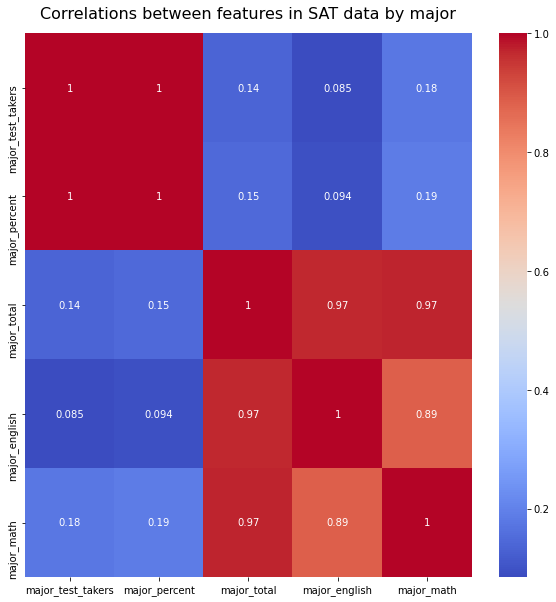

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(sat_major_2019.corr(), cmap='coolwarm', annot=True)
ax.set_title('Correlations between features in SAT data by major', fontsize = 16, loc = 'center', 
             pad = 15);

*Interpretation: On the bottom right, this "heat map" shows that math and english scores are highly correlated. Interestingly, the bottom left shows little correlation between number of test takers for a major and SAT scores.*

#### Histograms for variables of interest. As shown above, the math and english scores are highly correlated to the total score and to each other. So, I did not think it was worth looking at distributions for math and english scores separately.

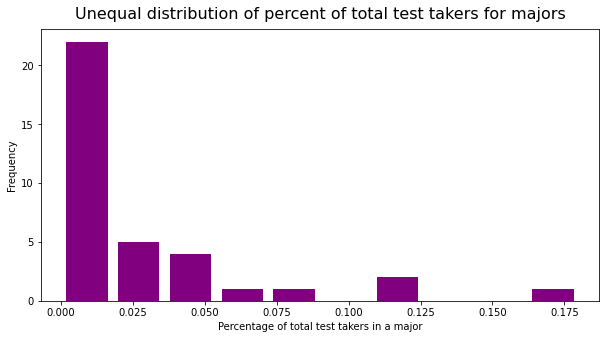

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

ax.hist(sat_major_2019['major_percent'], bins = 10, color = 'purple', rwidth = 0.8)

ax.set_xlabel('Percentage of total test takers in a major')
ax.set_ylabel('Frequency')
ax.set_title('Unequal distribution of percent of total test takers for majors',
             fontsize = 16, loc = 'center', pad=10);

*Intepretation: most of the majors have small numbers of test takers*

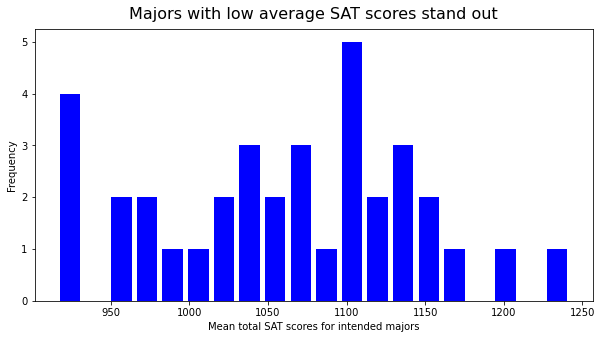

In [71]:
#Credit to the data visualization lecture notebook

fig, ax = plt.subplots(1, 1, figsize = (10, 5))

ax.hist(sat_major_2019['major_total'], bins = 20, color = 'b', rwidth = 0.8)

ax.set_xlabel('Mean total SAT scores for intended majors')
ax.set_ylabel('Frequency')
ax.set_title('Majors with low average SAT scores stand out',
             fontsize = 16, loc = 'center', pad=10);

*Interpretation: the left side of the graph shows that several majors have relatively low mean scores stand out from the rest*

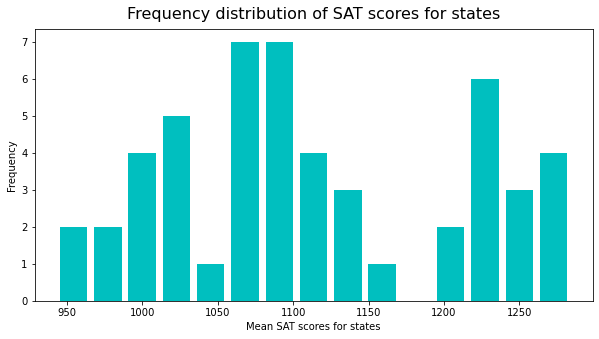

In [72]:
#Credit to the data visualization lecture notebook
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

ax.hist(all_state_level_data['total_2019'], bins = 15, color = 'c', rwidth = 0.8)

ax.set_xlabel('Mean SAT scores for states')
ax.set_ylabel('Frequency')
ax.set_title('Frequency distribution of SAT scores for states',
             fontsize = 16, loc = 'center', pad=10);

*Interpretation: distribution by state is very different than distribution by major. Clusters at middle and high end*

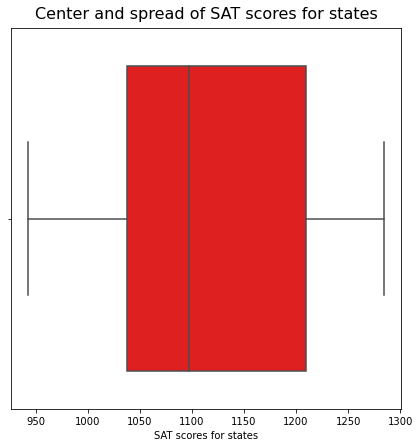

In [73]:
fig, ax = plt.subplots(1, 1, figsize = (7,7))

sns.boxplot(x=all_state_level_data['total_2019'], color='r')

ax.set_xlabel('SAT scores for states')
ax.set_title('Center and spread of SAT scores for states',
             fontsize = 16, loc = 'center', pad=10);

*Interpretation: No outliers. The median is somewhat less than the mean*

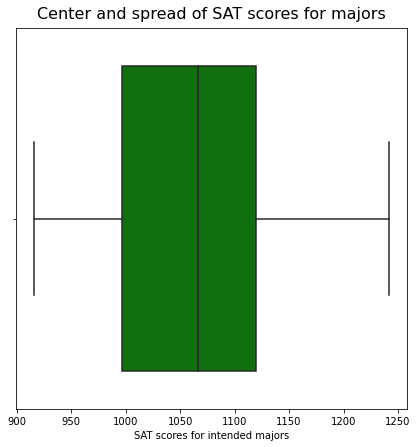

In [74]:
fig, ax = plt.subplots(1, 1, figsize = (7,7))

sns.boxplot(x=sat_major_2019['major_total'], color='g')

ax.set_xlabel('SAT scores for intended majors')
ax.set_title('Center and spread of SAT scores for majors',
             fontsize = 16, loc = 'center', pad=10);

*Interpretation: Little to take from this. The histogram is more informative. No outliers.*

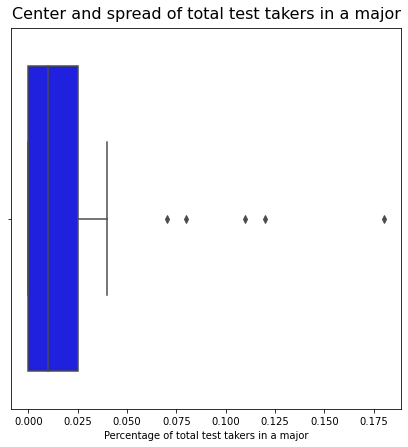

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (7,7))

sns.boxplot(x=sat_major_2019['major_percent'], color='b')

ax.set_xlabel('Percentage of total test takers in a major')
ax.set_title('Center and spread of total test takers in a major',
             fontsize = 16, loc = 'center', pad=10);

*Interpretation: it seems like there are a lot of infrequently declared majors and a few very frequently declared majors*

In [76]:
to_highlight = sat_major_2019[majors_mask]

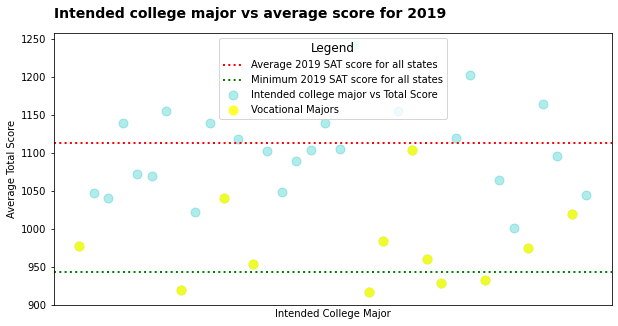

In [77]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

ax.scatter(sat_major_2019['intended_college_major'], sat_major_2019['major_total'],
           color = 'c', #marker color
           s = 80, #marker size
           alpha = 0.3, label = 'Intended college major vs Total Score');

# scatter: to_highlight.
ax.scatter(to_highlight['intended_college_major'], to_highlight['major_total'], s = 80, 
           color = 'yellow', alpha = 0.8,
           label = 'Vocational Majors')

# plot state average
ax.axhline(y = all_state_level_data['total_2019'].mean(), color = 'red',
           linestyle = ':', #dashed line
           linewidth = 2, label='Average 2019 SAT score for all states')

#plot state minimum
ax.axhline(y = all_state_level_data['total_2019'].min(), color = 'green',
           linestyle = ':', #dashed line
           linewidth = 2, label='Minimum 2019 SAT score for all states')

ax.legend(loc = 'upper center', title = 'Legend', title_fontsize = 'large')

# Remove ticks on x axis. Referred to https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
ax.tick_params(axis = 'x', bottom=False, top=False, labelbottom=False)

ax.set_xlabel('Intended College Major')
ax.set_ylabel('Average Total Score')
ax.set_title('Intended college major vs average score for 2019',
             fontsize = 14, fontweight = 'bold',
             loc = 'left', #alignment: left, center, right
             pad = 15 # move title a bit up
             );

*Interpretation: Vocational majors are yellow. This graph puts the vocational major data in the context of average data for states. Many of the vocational majors are near the minimum average total for a state.*